In [2]:
%matplotlib inline
import pandas as pd

In [3]:
# Print all outputs in jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
titles = pd.read_csv('pycon-pandas-tutorial/data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [5]:
cast = pd.read_csv('pycon-pandas-tutorial/data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
c=cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [28]:
c=cast
c=c[(c.character=="Superman")|(c.character=="Batman")]
c=c.groupby(['year','character']).size().sort_index()
c=c.unstack('character').fillna(0)
c.head()
len(c[(c.Superman-c.Batman)>0])

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [30]:
c=cast
c=c[(c.character=="Superman")|(c.character=="Batman")]
c=c.groupby(['year','character']).size().sort_index()
c=c.unstack('character').fillna(0)
len(c[(c.Batman-c.Superman)>0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0
...,...,...
2022,12.0,4.0
2023,2.0,0.0
2024,9.0,6.0


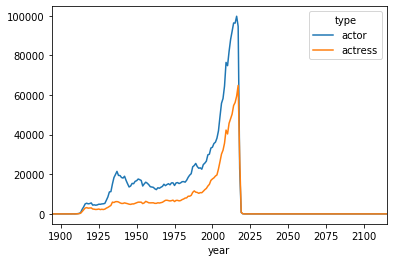

In [42]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack('type')
c=c.fillna(0)
c
c.plot(kind='line')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

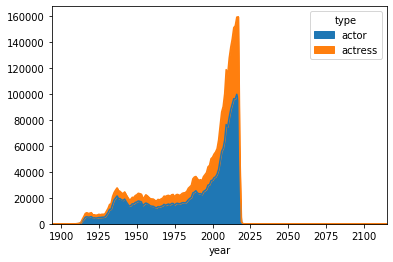

In [41]:
c.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

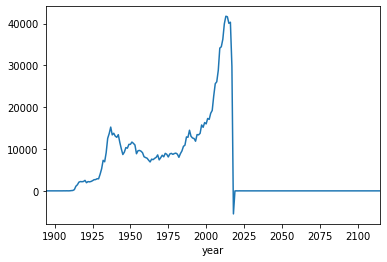

In [54]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack('type')
c=c.fillna(0)
d=c.actor-c.actress
d.plot(kind='line')

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

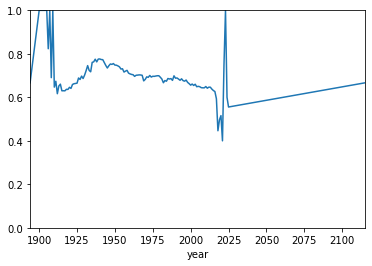

In [66]:
c=cast
c=c.groupby(['year','type']).size()
c=c.unstack('type')
c=c.fillna(0)
(c.actor/(c.actor+c.actress)).plot(ylim=[0,1],kind='line')

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

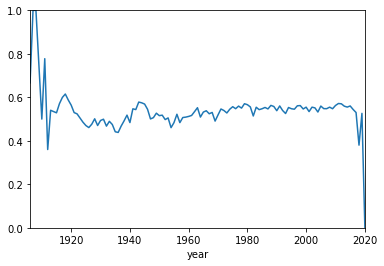

In [67]:
c=cast
c=c[c.n==2]
c=c.groupby(['year','type']).size()
c=c.unstack('type')
c=c.fillna(0)
(c.actor/(c.actor+c.actress)).plot(ylim=[0,1],kind='line')

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

type      actor  actress
n   year                
1.0 1906    2.0      1.0
    1907    1.0      0.0
    1908    1.0      0.0
    1909    1.0      0.0
    1910    1.0      4.0

n,1.0,2.0,3.0
year,,,
1906,0.666667,0.666667,0.0
1907,1.000000,1.000000,1.0
1908,1.000000,1.000000,1.0
1909,1.000000,NaN,NaN
1910,0.200000,0.500000,1.0


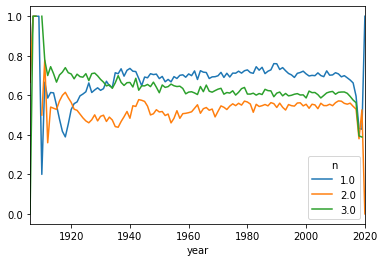

In [86]:
c=cast
c=c[c.n<=3]
c=c.groupby(['n','year','type']).size()
c=c.unstack('type')
c=c.fillna(0)
c.head()

d=(c.actor/(c.actor+c.actress))
d=d.unstack('n')
d.head()
d.plot()